In [9]:
# This program creates opportunity variables for countrys based on Relatedness, RCA, PCI and ECI

# Loading packages

In [10]:
import pandas as pd
import os
from google.colab import drive

# Setting the ambience

In [11]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
work_dir                      = '/content/gdrive/My Drive/ip_complexity/oec_data/create_variables_opportunity'
output_dir                    = '/content/gdrive/My Drive/ip_complexity/oec_data/create_variables_opportunity/output'
create_dataset_oec_dir        = '/content/gdrive/My Drive/ip_complexity/oec_data/create_dataset_oec/output/data'

# Oppening OEC dataset

In [13]:
df = pd.read_csv(create_dataset_oec_dir + "/dataset_oec.csv", sep = ";")

# Creating "opportunity_index" and other variables

In [14]:
df.describe()

,Unnamed: 0,year,eci,hs4_id,pci,tv_relatedness,tv_rca
count,3.882912e+06,3.882912e+06,3.003622e+06,3.882912e+06,3.513002e+06,3.882912e+06,3.882912e+06
mean,1.941456e+06,2.008087e+03,-5.092181e-12,5.341238e+03,6.848188e-13,1.510785e-01,1.281689e+00
std,1.120900e+06,7.772079e+00,9.957493e-01,2.795889e+03,9.994795e-01,1.212189e-01,2.517953e+01
min,0.000000e+00,1.995000e+03,-2.940098e+00,1.010000e+02,-3.568408e+00,0.000000e+00,0.000000e+00
25%,9.707278e+05,2.001000e+03,-7.489851e-01,2.846000e+03,-7.499092e-01,5.283817e-02,4.311969e-04
50%,1.941456e+06,2.008000e+03,-6.134007e-02,5.509000e+03,8.645780e-02,1.211273e-01,4.467748e-02
75%,2.912183e+06,2.015000e+03,7.586475e-01,8.211000e+03,7.775102e-01,2.201140e-01,4.218194e-01
max,3.882911e+06,2.021000e+03,2.260692e+00,9.706000e+03,3.153356e+00,9.479168e-01,1.438242e+04


In [15]:
df["opportunity_index_1"] = df.tv_relatedness + df.pci
df["opportunity_index_2"] = (df.tv_relatedness * 0.66) + (df.pci * 0.33) # using weights of a "Ballanced portfolio" approach defined in https://atlas.cid.harvard.edu/countries/32/growth-opportunities
df["opportunity_index_3"] = (df.tv_relatedness * 0.80) + (df.pci * 0.20) # using weights of a "Low hanging fruit" approach defined in https://atlas.cid.harvard.edu/countries/32/growth-opportunities

In [16]:
df["rca_bigger_1"] = (df["tv_rca"] >= 1).astype(int) # Creating dummy of rca_bigger_1

In [17]:
df = df.rename(columns = {"product_name_hs4": "hs4_name",
                          "rca_bigger_1":"tv_rca_bigger_1",
                          "eci": "country_eci",
                          "pci": "hs4_pci"})

# Save

In [18]:
df.to_csv(output_dir + "/data/dataset_oec_with_opportunity.csv", index = False)

# Analysis

In [19]:
# Define the desired order of columns
new_order = ['year', 'country_id', 'country', 'country_eci', 'hs4_id', 'hs4_name', 'hs4_pci', 'tv_relatedness', 'tv_rca', 'opportunity_index_1', 'opportunity_index_2', 'opportunity_index_3', 'tv_rca_bigger_1']
# Reorder the columns
df = df[new_order]

In [20]:
df = df.sort_values(by = "opportunity_index_2", ascending = False)

In [21]:
df[(df["country"] == "Brazil") & (df["year"] == 2021) &
   (df["tv_rca_bigger_1"] == 0) & (df["hs4_pci"] > df["country_eci"])].sort_values(by = "tv_relatedness", ascending = False)

,year,country_id,country,country_eci,hs4_id,hs4_name,hs4_pci,tv_relatedness,tv_rca,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca_bigger_1
703786,2021,sabra,Brazil,0.330267,4007,Rubber Thread,0.701966,0.161120,0.088571,0.863087,0.337988,0.269290,0
1266488,2021,sabra,Brazil,0.330267,2937,Hormones,0.584113,0.158897,0.003105,0.743010,0.297629,0.243940,0
290971,2021,sabra,Brazil,0.330267,8704,Delivery Trucks,0.532471,0.158627,0.827901,0.691098,0.280409,0.233396,0
878115,2021,sabra,Brazil,0.330267,404,Whey and other milk products,0.475920,0.155586,0.055111,0.631506,0.259740,0.219653,0
606847,2021,sabra,Brazil,0.330267,3904,Vinyl Chloride Polymers,0.464246,0.154428,0.210857,0.618674,0.255124,0.216392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978043,2021,sabra,Brazil,0.330267,7410,Copper Foil,1.363887,0.100366,0.011150,1.464253,0.516324,0.353070,0
785192,2021,sabra,Brazil,0.330267,8517,Telephones,1.026805,0.099729,0.040870,1.126535,0.404667,0.285144,0
1148251,2021,sabra,Brazil,0.330267,8534,Printed Circuit Boards,1.122328,0.099475,0.004507,1.221803,0.436022,0.304046,0
1083647,2021,sabra,Brazil,0.330267,9013,LCDs,1.563203,0.094325,0.005088,1.657527,0.578111,0.388100,0


In [22]:
df[(df["country"] == "Brazil") & (df["year"] == 2021) &
   (df["tv_rca_bigger_1"] == 0) & (df["hs4_pci"] > df["country_eci"])].describe()

,year,country_eci,hs4_id,hs4_pci,tv_relatedness,tv_rca,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca_bigger_1
count,404.0,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.0
mean,2021.0,3.302667e-01,6735.482673,0.942234,0.129536,0.195874,1.071770,0.396431,0.292076,0.0
std,0.0,5.557998e-17,2358.363252,0.421888,0.011404,0.213180,0.416199,0.135547,0.080120,0.0
min,2021.0,3.302667e-01,209.000000,0.332190,0.089047,0.000000,0.457285,0.191122,0.164581,0.0
25%,2021.0,3.302667e-01,4004.250000,0.590845,0.121841,0.032872,0.721977,0.280180,0.224769,0.0
50%,2021.0,3.302667e-01,8004.000000,0.885084,0.130217,0.115512,1.007552,0.377305,0.279780,0.0
75%,2021.0,3.302667e-01,8511.250000,1.232851,0.137911,0.280853,1.352805,0.486140,0.344096,0.0
max,2021.0,3.302667e-01,9701.000000,2.386398,0.161120,0.996700,2.493695,0.858327,0.563117,0.0


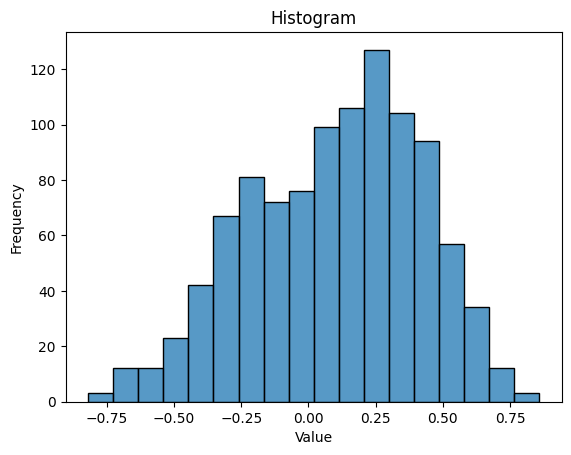

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram using Seaborn
sns.histplot(df[(df["country"] == "Brazil") & (df["year"] == 2021)]["opportunity_index_2"])

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the histogram
plt.show()


In [27]:
df[(df["country"] == "Brazil") & (df["year"] == 2021)].sort_values(by = 'opportunity_index_3', ascending = False)

,year,country_id,country,country_eci,hs4_id,hs4_name,hs4_pci,tv_relatedness,tv_rca,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca_bigger_1
1150442,2021,sabra,Brazil,0.330267,3705,Developed Exposed Photographic Material,2.386398,0.107297,0.002086,2.493695,0.858327,0.563117,0
1419542,2021,sabra,Brazil,0.330267,9010,Photo Lab Equipment,2.194274,0.114281,0.000079,2.308555,0.799536,0.530280,0
379632,2021,sabra,Brazil,0.330267,8457,Metalworking Transfer Machines,2.166835,0.101803,0.131180,2.268638,0.782245,0.514809,0
1023043,2021,sabra,Brazil,0.330267,3707,Photographic Chemicals,2.028507,0.119530,0.005757,2.148037,0.748297,0.501325,0
888143,2021,sabra,Brazil,0.330267,2920,Other Esters,1.926342,0.125960,0.012913,2.052302,0.718827,0.486036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537100,2021,sabra,Brazil,0.330267,8109,Zirconium,NaN,0.166830,0.018399,NaN,NaN,NaN,0
3537101,2021,sabra,Brazil,0.330267,8469,Typewriters,NaN,0.151458,0.000000,NaN,NaN,NaN,0
3537102,2021,sabra,Brazil,0.330267,9008,Image Projectors,NaN,0.123305,0.001264,NaN,NaN,NaN,0
3537103,2021,sabra,Brazil,0.330267,9110,Incomplete Movement Sets,NaN,0.105325,0.000564,NaN,NaN,NaN,0


# Cars

In [23]:
df[(df["country"] == "Brazil") & (df['hs4_name'] == 'Cars')].sort_values(by = 'year', ascending = False)

,year,country_id,country,country_eci,hs4_id,hs4_name,hs4_pci,tv_relatedness,tv_rca,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca_bigger_1
370486,2021,sabra,Brazil,0.330267,8703,Cars,0.867416,0.141197,0.342660,1.008613,0.379437,0.286441,0
359586,2020,sabra,Brazil,0.439039,8703,Cars,0.893035,0.154277,0.350981,1.047312,0.396524,0.302029,0
336494,2019,sabra,Brazil,0.449978,8703,Cars,0.873118,0.156918,0.402045,1.030035,0.391694,0.300158,0
303574,2018,sabra,Brazil,0.517411,8703,Cars,0.755553,0.156534,0.547347,0.912087,0.352645,0.276338,0
258099,2017,sabra,Brazil,0.523580,8703,Cars,0.754456,0.145698,0.693351,0.900154,0.345131,0.267449,0
332248,2016,sabra,Brazil,0.545673,8703,Cars,0.660033,0.155650,0.543266,0.815683,0.320540,0.256527,0
444939,2015,sabra,Brazil,0.671455,8703,Cars,0.519927,0.165579,0.400532,0.685507,0.280858,0.236449,0
465380,2014,sabra,Brazil,0.682210,8703,Cars,0.519411,0.154082,0.364538,0.673493,0.273100,0.227148,0
360046,2013,sabra,Brazil,0.732804,8703,Cars,0.510168,0.151334,0.613054,0.661502,0.268236,0.223101,0
374772,2012,sabra,Brazil,0.701353,8703,Cars,0.630833,0.158158,0.461431,0.788991,0.312559,0.252693,0
